In [1]:
!pip install tensorflow --user
!pip install keras
!pip install daytime
!pip install torch


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

In [4]:
RANDOM_SEED = 2021
LABELS = ["Normal", "Fraud"]


In [5]:
# Load dataset
dataset = pd.read_csv("creditcard.csv")

In [6]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
# Check for null values
print("Any nulls in the dataset:", dataset.isnull().values.any())
print("Class distribution:\n", pd.value_counts(dataset['Class'], sort=True))


Any nulls in the dataset: False
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_17564\3140868996.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print("Class distribution:\n", pd.value_counts(dataset['Class'], sort=True))


In [10]:
# Scaling 'Time' and 'Amount'
sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))


In [11]:
# Data split for Autoencoder training
data = dataset.drop(columns=['Class'])
labels = dataset['Class']
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=RANDOM_SEED
)

In [14]:
# Normalize the data between 0 and 1 using NumPy
min_val = np.min(train_data.values)
max_val = np.max(train_data.values)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

In [17]:
train_data, test_data = tf.convert_to_tensor(train_data, dtype=tf.float32), tf.convert_to_tensor(test_data, dtype=tf.float32)


In [22]:
# Ensure that labels are in Pandas format for boolean indexing
train_labels = train_labels.to_numpy() if isinstance(train_labels, tf.Tensor) else train_labels
test_labels = test_labels.to_numpy() if isinstance(test_labels, tf.Tensor) else test_labels


In [25]:
# Convert labels to NumPy arrays for compatibility with TensorFlow data
train_labels_np = train_labels.to_numpy().astype(bool)
test_labels_np = test_labels.to_numpy().astype(bool)

# Separate normal and fraud data for training and testing using boolean indexing
normal_train_data = train_data[~train_labels_np]
fraud_test_data = test_data[test_labels_np]

# Convert these subsets back to TensorFlow tensors
normal_train_data = tf.convert_to_tensor(normal_train_data, dtype=tf.float32)
fraud_test_data = tf.convert_to_tensor(fraud_test_data, dtype=tf.float32)



In [26]:
# Build the Autoencoder
input_dim = normal_train_data.shape[1]
encoding_dim = 14
hidden_dim_1 = encoding_dim // 2
hidden_dim_2 = 4
learning_rate = 1e-7

In [27]:
# Define layers
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",
                                activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)


In [28]:
# Compile the Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')


In [31]:
# Set up callbacks
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.keras",mode='min', monitor='val_loss', verbose=2, save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1,mode='min', restore_best_weights=True)


In [32]:
# Train the Autoencoder
history = autoencoder.fit(normal_train_data, normal_train_data,
                          epochs=50,
                          batch_size=64,
                          shuffle=True,
                          validation_data=(test_data, test_data),
                          verbose=1,
                          callbacks=[cp, early_stop]
                          ).history

Epoch 1/50
3538/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0421 - loss: 0.0123
Epoch 1: val_loss improved from inf to 0.00002, saving model to autoencoder_fraud.keras
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.0421 - loss: 0.0122 - val_accuracy: 0.0266 - val_loss: 2.1718e-05
Epoch 2/50
3539/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0725 - loss: 1.9105e-05
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.keras
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0725 - loss: 1.9105e-05 - val_accuracy: 0.0043 - val_loss: 2.0000e-05
Epoch 3/50
3547/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0915 - loss: 1.8856e-05
Epoch 3: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.keras
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.0915 - loss: 1.8856e-05 - val_accuracy: 0.0627 - val_loss: 1.8423e-05
Epoch 4/50
3548/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1195 - l

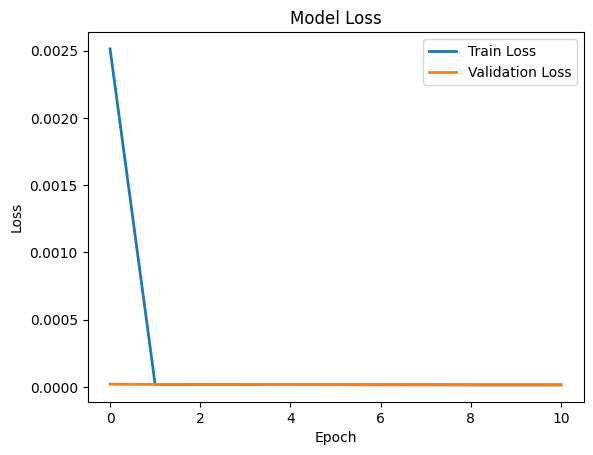

In [33]:
# Plot training and validation loss
plt.plot(history['loss'], linewidth=2, label='Train Loss')
plt.plot(history['val_loss'], linewidth=2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [34]:
# Reconstruction errors for test data
test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': test_labels})


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [35]:
# Calculate threshold (99th percentile of training loss)
train_predictions = autoencoder.predict(normal_train_data)
train_mse_loss = np.mean(np.power(normal_train_data - train_predictions, 2), axis=1)
threshold = np.percentile(train_mse_loss, 99)
print("Calculated threshold:", threshold)

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
Calculated threshold: 0.0001498460092989271


In [36]:
# Detect anomalies (reconstruction error above threshold)
pred_y = [1 if e > threshold else 0 for e in error_df.Reconstruction_error.values]
error_df['Predicted'] = pred_y

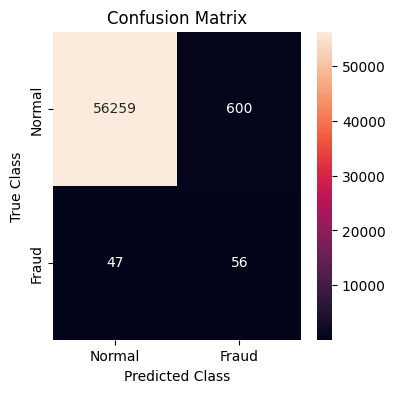

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(error_df.True_class, error_df.Predicted)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


In [38]:
# Print accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy_score(error_df['True_class'], error_df['Predicted']))
print("Recall:", recall_score(error_df['True_class'], error_df['Predicted']))
print("Precision:", precision_score(error_df['True_class'], error_df['Predicted']))
print("F1 Score:", f1_score(error_df['True_class'], error_df['Predicted']))

Accuracy: 0.9886415505073558
Recall: 0.5436893203883495
Precision: 0.08536585365853659
F1 Score: 0.14756258234519104


C:\Users\Dell\AppData\Local\Temp\ipykernel_17564\1738067073.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(dataset['Class'], sort = True)


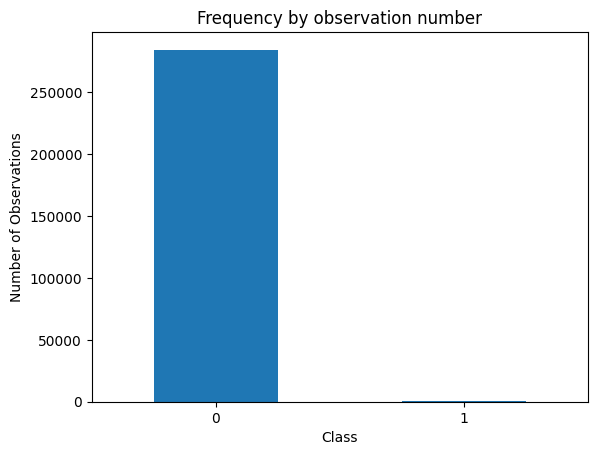

In [39]:
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [47]:
history

{'accuracy': [0.04733223095536232,
  0.06989923119544983,
  0.09725837409496307,
  0.1168401837348938,
  0.13105392456054688,
  0.16651132702827454,
  0.20352068543434143,
  0.24959112703800201,
  0.278999000787735,
  0.2977762818336487,
  0.3061339259147644],
 'loss': [0.0025123495142906904,
  1.913065898406785e-05,
  1.871751737780869e-05,
  1.8233769878861494e-05,
  1.8000355339609087e-05,
  1.765643355611246e-05,
  1.7355483578285202e-05,
  1.69484246725915e-05,
  1.662935574131552e-05,
  1.644624353502877e-05,
  1.639004949538503e-05],
 'val_accuracy': [0.026579122990369797,
  0.004283557645976543,
  0.06270847469568253,
  0.030634457245469093,
  0.07559425383806229,
  0.23561321198940277,
  0.2631227970123291,
  0.3045714795589447,
  0.2874196767807007,
  0.31877392530441284,
  0.31389346718788147],
 'val_loss': [2.1717707568313926e-05,
  2.0000237782369368e-05,
  1.8422842913423665e-05,
  1.8615422959555872e-05,
  1.8099470253218897e-05,
  1.8304728655493818e-05,
  1.68241276696